### Exercise 1g)

In this part, we do a bias-variance tradeoff analysis for OLS regression. 

In [6]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from methods.resampling import ResamplingMethods
from utils import generate_dataset, runge

In [7]:
# Defining dataset
np.random.seed(124)  
x, y = generate_dataset()

In [8]:
# IGNORE THIS LINE
_ = np.random.uniform(-1, 1, 6)
# It is just to get random values consistent with the report results

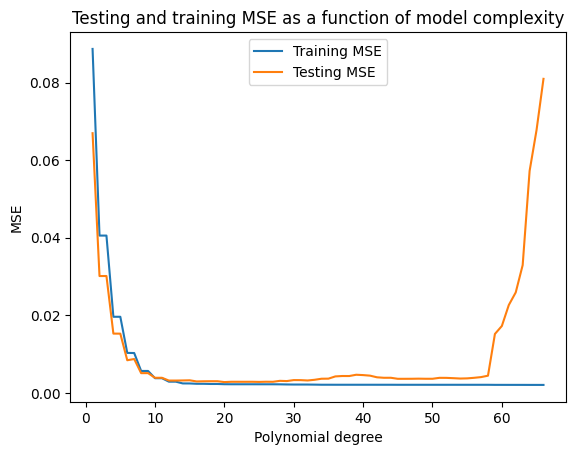

In [9]:
## Figure 2.11 of Hastie et al. 

max_degree = 66

resampling_methods = ResamplingMethods(x,y, max_degree=max_degree)
mse_train = resampling_methods.direct_mse(test_data = False)

resampling_methods = ResamplingMethods(x,y, max_degree=max_degree)
mse_test = resampling_methods.direct_mse(test_data = True)

plt.plot(range(1,max_degree+1), mse_train,label="Training MSE")
plt.plot(range(1,max_degree+1), mse_test,label="Testing MSE")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.legend()
plt.title("Testing and training MSE as a function of model complexity")
plt.show()

In the plot below, we tried different numbers of datapoints and seed values for the train-test-split function and noted down the range of polynomial degrees where the bias and variance were at a minimum. This is the basis for table 2 in the report. 

Note that, in order to make sure to get the same results as in the report, *you must run the whole program* from the top. This is because we create the seed value for numpy random in a code block above.  

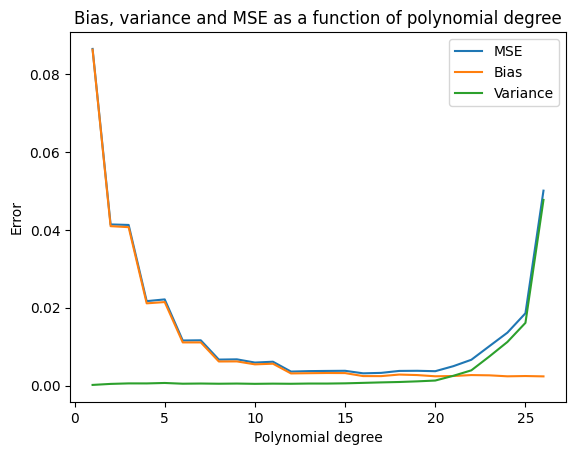

In [10]:
n = 400
x = np.random.uniform(-1, 1, n)
y = runge(x) + 0.05*np.random.normal(0, 1, n)

max_degree = 26
resampling_methods = ResamplingMethods(x,y, max_degree=max_degree,random_state=40)

mse, bias, variance = resampling_methods.bootstrap(n_bootstraps = 500)

plt.plot(range(1, max_degree+1), mse, label="MSE")
plt.plot(range(1, max_degree+1), bias, label="Bias")
plt.plot(range(1, max_degree+1), variance, label="Variance")
plt.xlabel("Polynomial degree")
plt.ylabel("Error")
plt.title("Bias, variance and MSE as a function of polynomial degree")
plt.legend()
plt.show()